In [105]:
import sys, math
from skimage import data, io, filters, color
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread, imshow
from skimage.color import rgb2gray
from collections import defaultdict

Part 1:

In [106]:
def BitQuantizeImage(im, k):
    # n = 8
    # Error checking part
    if k >= 8 or k <= 0:
        print ("Error detected: invalid k value")
        return
    
    img = np.zeros(im.shape, dtype=np.uint8)
    
    for row in range(im.shape[0]):
        for col in range(im.shape[1]):
            if len(im.shape) == 2:
                temp = int(im[row][col])
                for i in range(2**k):
                    if (temp >= 2**(8-k) * i) and (temp < 2**(8-k) * (i+1)):
                        img[row][col] = int(2**(8-k-1) * (2 * i + 1))
                        break
            else:
                for chan in range(im.shape[2]):
                    # size of new partition = 2 ^ (8-k)
                    # no of new partitions = 2^k
                    temp = int(im[row][col][chan])
                    for i in range(2**k):
                        if (temp >= 2**(8-k) * i) and (temp < 2**(8-k) * (i+1)):
                            img[row][col][chan] = int(2**(8-k-1) * (2 * i + 1))
                            break
    return img

In [107]:
def BitQuantizeDisplay(im):
    # n = 8
    for k in range(1,8):
        img = BitQuantizeImage(im, k)
        plt.figure()
        if len(img.shape) == 2:
            plt.imshow(img, cmap = "gray")
        else:
            plt.imshow(img)

Colour Image:

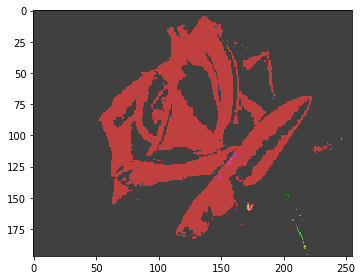

In [108]:
im1 = imread("./A1_resources/Q6/rose.jpeg")
img1 = BitQuantizeImage(im1,1)
imshow(img1)

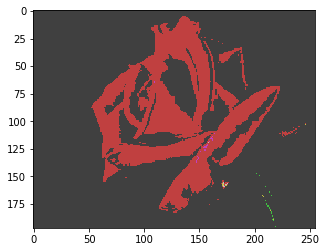

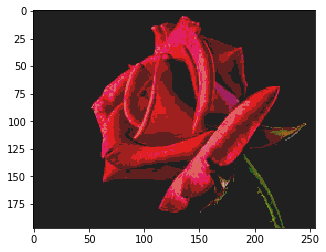

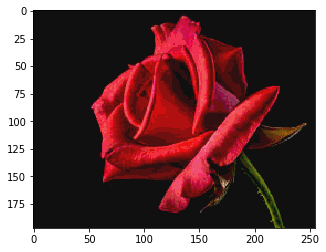

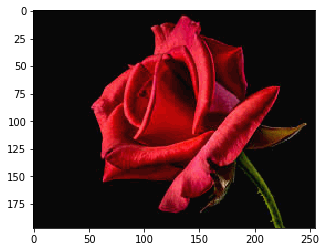

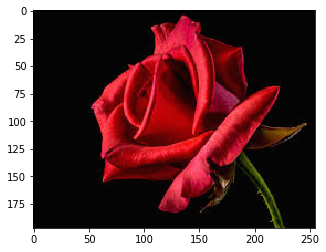

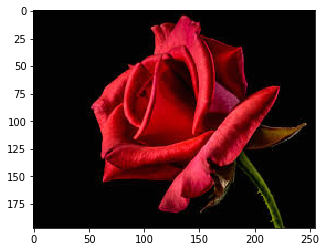

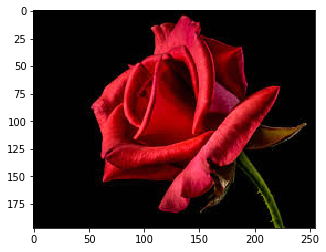

In [109]:
im2 = imread("./A1_resources/Q6/rose.jpeg")
BitQuantizeDisplay(im2)

Black and White Image:

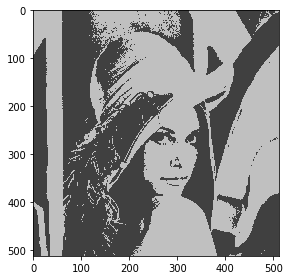

In [110]:
im3 = imread("./A1_resources/lena.bmp")
img3 = BitQuantizeImage(im3,1)
imshow(img3, cmap = "gray")

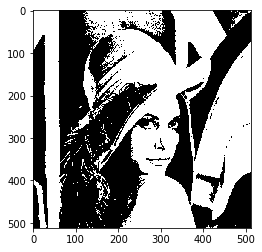

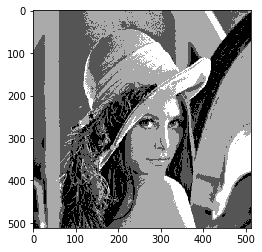

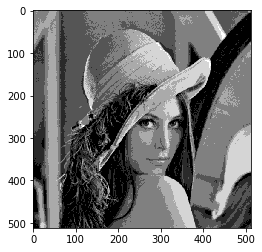

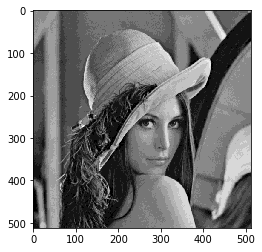

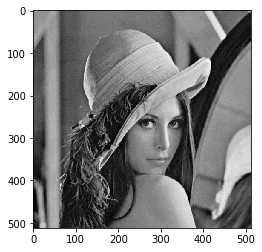

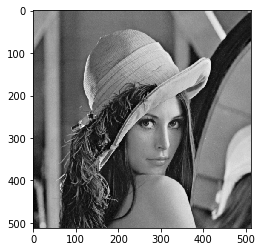

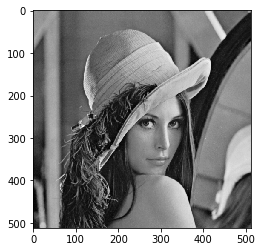

In [111]:
im4 = imread("./A1_resources/lena.bmp")
BitQuantizeDisplay(im4)

Part 2: Range of k for an n bit image: i where $0 < i < n, (2^i < 2^n),  n = 8$